In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML(r"<style>.output {display: flex; \
              align-items: center; \
              text-align: center;} \
              </style>"))

# Data Story

In [24]:
heart_prev = pd.read_csv("heart_disease_restaurants.csv")
heart_prev.drop("Unnamed: 0", axis=1, inplace=True)
display(heart_prev.head())
display(heart_prev.info())

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count,Population,Population Group,Restaurant Group,median_household_income
0,1104,24.269272,33.257045,37.437441,37.721353,38.392990,14.837576,8.816472,5.0,6726,5000-10000,0-7,32273.0
1,1105,28.596151,32.879892,42.176132,43.694299,37.409454,15.840128,7.849705,4.0,6075,5000-10000,0-7,18402.0
2,1108,23.844497,30.236068,35.381122,34.251449,35.500119,12.581968,6.943035,2.0,7038,5000-10000,0-7,34064.0
3,1109,23.329629,32.285360,37.212078,33.779183,34.154532,13.474276,6.706302,2.0,7577,5000-10000,0-7,33376.0
4,1119,21.656562,30.136570,33.192432,29.277953,34.842082,11.433115,6.894488,2.0,5361,5000-10000,0-7,46055.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 0 to 3658
Data columns (total 13 columns):
Zip Code                    3659 non-null int64
Smoking Prevalence          3659 non-null float64
Hypertension Prevalence     3659 non-null float64
Obesity Prevalence          3659 non-null float64
Sedentarism Prevalence      3659 non-null float64
Cholesterol Prevalence      3659 non-null float64
Diabetes Prevalence         3659 non-null float64
Heart Disease Prevalence    3659 non-null float64
Restaurant Count            3659 non-null float64
Population                  3659 non-null int64
Population Group            3659 non-null object
Restaurant Group            3659 non-null object
median_household_income     3659 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 371.7+ KB


None

## Features with positive correlations

#### Do the data show established relationships between heart disease and its risk factors?

Below are joint plots of heart disease prevalence and positively correlated features: smoking, hypertension, obesity, sedentarism, high cholesterol, and diabetes.


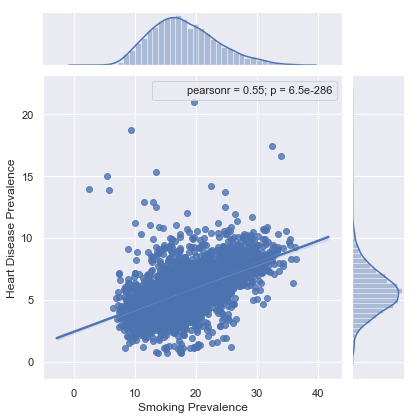

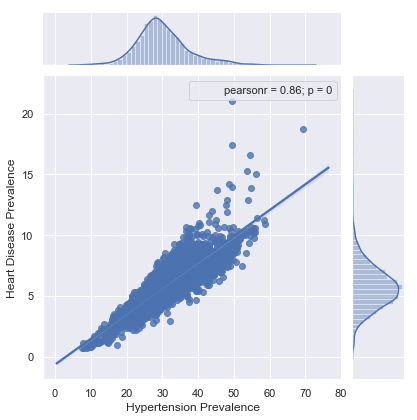

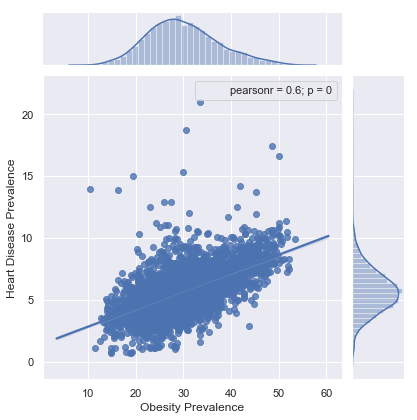

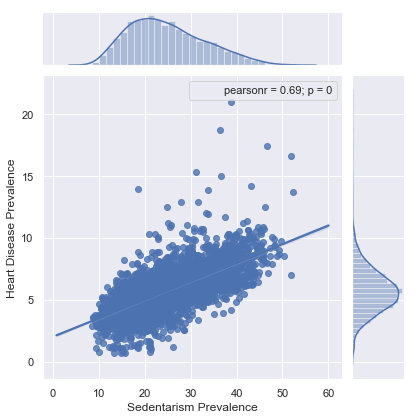

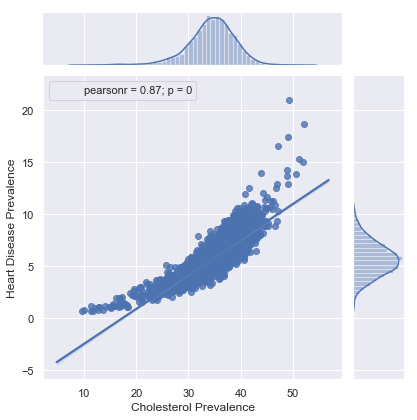

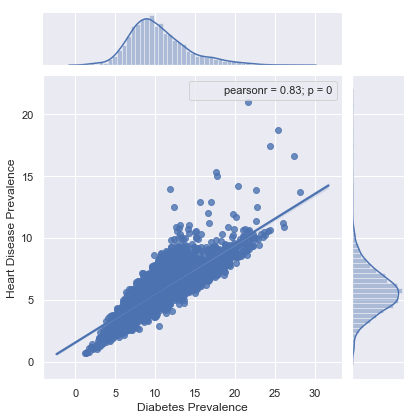

In [25]:
sns.jointplot("Smoking Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Hypertension Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Obesity Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Sedentarism Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Cholesterol Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Diabetes Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

From the joint plots it can be seen that these risk factors are strongly correlated with heart disease prevalence. Hypertenion, high cholesterol and diabetes have the strongest correlations.

These are known major risk factors for heart disease so strong correlations are expected.

##  Heart disease and median household income

#### Does median household income, a factor of socioeconomic status, show a relationship to heart disease?

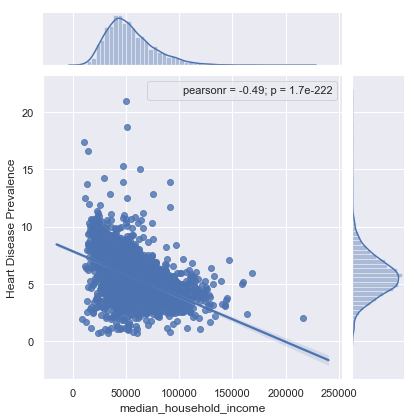

In [26]:
sns.jointplot("median_household_income","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

We see there is a moderate to strong negative correlation between median household income and heart disease prevalence.

One hypothesis is residents of zip codes with an average larger income likely have better access to healthcare, exercise and food options.

#### How is income distributed?

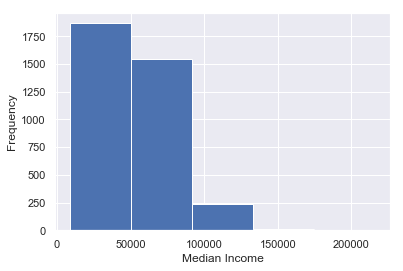

In [27]:
plt.hist(heartprev_copy["median_household_income"], bins=5)
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()

We see that most data points fall above and below 50000.

We will separate the data into groups based on this cutoff.

In [28]:
# Create a new column specifying median household income groups

heartprev_copy = heart_prev.copy()

incomegroups = []
for income in heartprev_copy["median_household_income"]:
    if income <50000:
        incomegroups.append("<50000")
    if income >= 50000:
        incomegroups.append(">=50000")
        
heartprev_copy["Income Group"]= incomegroups

In [29]:
_ = heartprev_copy.groupby("Income Group")["Heart Disease Prevalence"].mean().reset_index()
display(_)

,Income Group,Heart Disease Prevalence
0,<50000,6.478394
1,>=50000,4.992856


We see that the prevalence of heart disease is larger when income is <50000.

We will statistically test the significance of the difference between groups.

## Heart disease and zip code population

#### Is there a correlation between zip code population and heart disease?

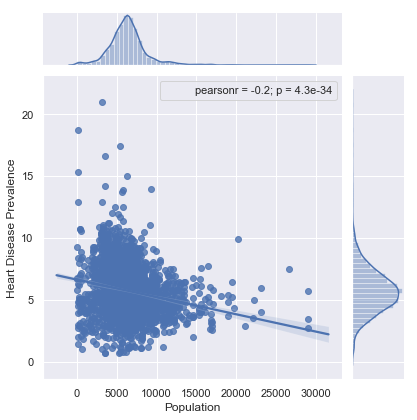

In [30]:
sns.jointplot("Population","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

We see there is a weak negative correlation between zip code population size and heart disease prevalence.

This may due to lower incomes in less populated zip codes.

#### Is the difference in heart disease by population due to income?

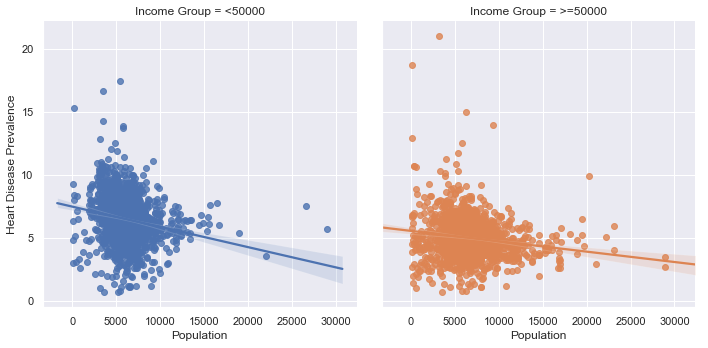

Income Group: <50000
-----------------------------
pearson r and p-value:  (-0.1987705121543528, 9.820629334507555e-18) 

Income Group: >=50000
-----------------------------
pearson r and p-value:  (-0.15611485346214385, 1.833777929192321e-11) 



In [31]:
sns.lmplot("Population","Heart Disease Prevalence",data=heartprev_copy,fit_reg=True,col="Income Group",hue="Income Group")
plt.show()

igroups = ["<50000",">=50000"]
for group in igroups:
    prev = heartprev_copy.loc[heartprev_copy["Income Group"] == group]
    _ = stats.pearsonr(prev["Population"],prev["Heart Disease Prevalence"])
    print("Income Group: {}".format(group))
    print("-----------------------------")
    print("pearson r and p-value: ", _,"\n")

We see that when population group is accounted for, there is still a negative correlation between population and heart disease prevalence.

#### How are populations distributed?

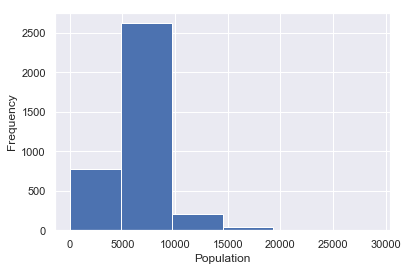

In [32]:
plt.hist(heart_prev["Population"], bins=6)
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

We see that most of the data points represent lower sized zip codes.

We will refine population groups to <10000 and >=10000 for comparison of low population and high population zip codes.

In [33]:

# Create a new column specifying population group by size
popgroups = []
for pop in heartprev_copy["Population"]:
    if pop <10000:
        popgroups.append("<10000")
    if pop >=10000:
        popgroups.append(">=10000")
        
heartprev_copy["Population Group"]= popgroups

#### Does the mean prevalence of heart disease differ when examined by population group?

In [34]:
_ = heartprev_copy.groupby("Population Group")["Heart Disease Prevalence"].mean().reset_index()
display(_)

,Population Group,Heart Disease Prevalence
0,<10000,5.791016
1,>=10000,4.848598


We see that there is a difference in the prevalence of heart disease between the two groups.

We can perform statistical testing to examine whether this difference is due to chance.

## Heart disease and restaurant count

#### Is the number of fast food restaurants within a zip code correlated to heart disease?

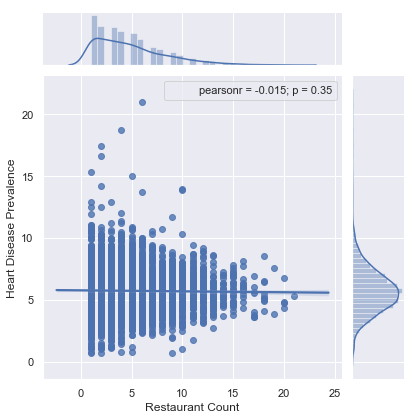

In [35]:
sns.jointplot("Restaurant Count","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

From the plot we see that when viewing all zip codes, there is likely no correlation between a zip code's restaurant count and its heart disease prevalence.

#### Is the number of fast food restaurants correlated to heart disease when examined by population size?

In the following plots we break down the zip codes by population size and plot restuarant count against heart disease prevalence.

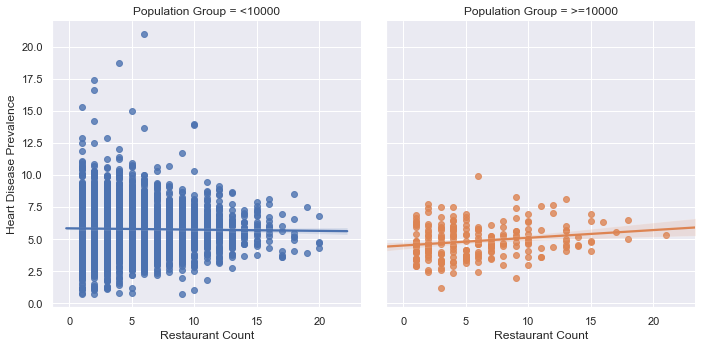

Population Group: <10000
-----------------------------
pearson r and p-value:  (-0.019071014429678013, 0.263464919373702) 

Population Group: >=10000
-----------------------------
pearson r and p-value:  (0.19267579670675944, 0.004211248461558375) 



In [36]:
sns.lmplot("Restaurant Count","Heart Disease Prevalence",data=heartprev_copy,fit_reg=True, 
           col="Population Group", hue="Population Group", col_wrap=2)
plt.show()


pgroups = ["<10000",">=10000"]
for group in pgroups:
    prev = heartprev_copy.loc[heartprev_copy["Population Group"] == group]
    _ = stats.pearsonr(prev["Restaurant Count"],prev["Heart Disease Prevalence"])
    print("Population Group: {}".format(group))
    print("-----------------------------")
    print("pearson r and p-value: ", _,"\n")

We see there is likely no correlation between restaurant count and heart disease in populations below 10000.

In populations >=10000 there is a weak positive correlation.

In [38]:
# Export to file
export_csv = heartprev_copy.to_csv('heart_disease.csv', header=True)